# Mapserver / Mapfile

In [50]:
from glob import glob
from IPython.display import display, HTML
from matplotlib import pyplot as plt

import geopandas as gpd
import os
import rasterio
# local
import AlertaDengue as alert_dengue

## Setting variables

In [48]:
shp_path = '%s/static/shapefile' % alert_dengue.__path__[0]
raster_dir_path = os.path.join(
    os.path.dirname(alert_dengue.__path__[0]),
    'tiffs'
)

In [3]:
# Rio de Janeiro's conf
geocode = 3304557
city_name = 'Rio de Janeiro'
# extent = '-4889577.9629838 -2648998.9936479 -4780083.386022 -2589072.9076081'

# Curitiba's conf
# geocode = 4106902
# city_name = 'Curitiba'
# extent = '-5502641.8656547 -2956723.5629958 -5471754.0373563 -2915478.1395794'

alert_level = 2
disease = 'dengue'

## Check Shapefile

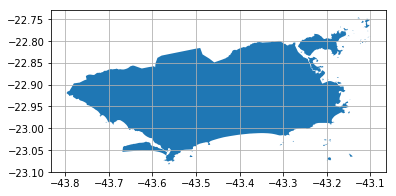

In [4]:
gdf = gpd.GeoDataFrame.from_file(os.path.join(shp_path, '%s.shp' % geocode))
gdf.plot()

plt.grid(True)
plt.show()

In [5]:
# boundaries
gdf.bounds

,minx,miny,maxx,maxy
0,-43.796539,-23.082893,-43.099039,-22.74602


In [6]:
str_boundaries = [str(v) for v in gdf.bounds.iloc[0].values]
extent = ' '.join(str_boundaries)
extent_url = ','.join(str_boundaries)

In [7]:
# crs/srs
gdf.crs

{'init': 'epsg:4326'}

In [8]:
crs_proj = gdf.crs['init']
wms_srs = crs_proj.upper()

## Visualize raster images

In [46]:
def show_raster_info(src):
    """
    """
    print('width, heigh:', src.width, src.height)
    print('crs:', src.crs)
    print('transform:', src.transform)
    print('count:', src.count)
    print('indexes:', src.indexes)
    for i in range(src.count):
        j = i+1
        print('colorinterp (%s):' % j, src.colorinterp(j))

    # print(help(src))
    print('nodatavals:', src.nodatavals)
    print('nodata:', src.nodata)
    print('mask (dtype):', src.read_masks().dtype)

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


/home/xmn/miniconda3/envs/alertadengue/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  """


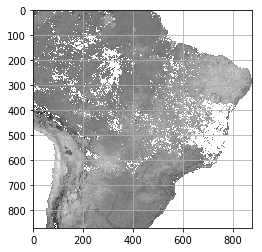

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


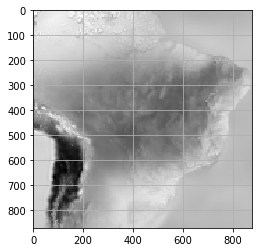

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


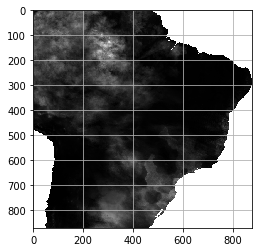

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


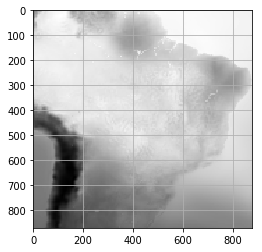

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


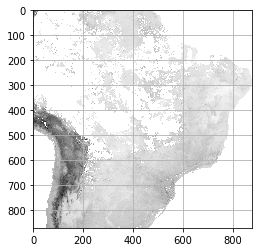

width, heigh: 874 870
crs: CRS({'init': 'epsg:4326'})
transform: [-74.02117941144857, 0.04491576420597607, 0.0, 5.300060176305177, 0.0, -0.04491576420597607]
count: 1
indexes: (1,)
colorinterp (1): ColorInterp.grey
nodatavals: (None,)
nodata: None
mask (dtype): uint8


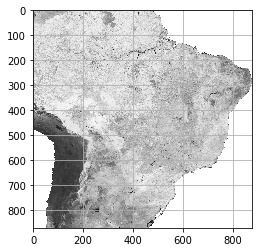

In [61]:
for raster_file_path in glob(os.path.join(raster_dir_path, '*')):
    with rasterio.open(raster_file_path) as src:
        raster_name = raster_file_path.split(os.sep)[-1]
        display(HTML('\n<H3>%s</H3>' % raster_name))
        show_raster_info(src)
        
        # plot image
        img = src.read()[0]
        plt.imshow(img, cmap='gray')
        plt.grid(True)
        plt.show()

## Visualizing the map

In [9]:
HTML('''
<script type="text/javascript">
    var extent_url = '%s';
    var crs_proj = '%s';
</script>
''' % (extent_url, crs_proj))

In [12]:
%%html

<div id="alerta_dengue" style="height: 400px; width: 800px;"></div>

<link rel="stylesheet" href="lib/leaflet/leaflet.css" />
<script type="text/javascript" src="lib/leaflet/leaflet.js"></script>

<script>

var mapfile_url = (
    'http://localhost:81/cgi-bin/mapserv?' + 
    'map=/var/www/mapserver/mapfiles/dengue.map&' + 
    'SERVICE=WMS&VERSION=1.1.1&REQUEST=GetMap&LAYERS=RIO_DE_JANEIRO&' +
    'STYLES=&SRS=' + crs_proj + '&BBOX=' + extent_url + '&' +
    'WIDTH=400&HEIGHT=300&FORMAT=image/png'
);

var osmUrl='http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png';
var osmAttrib = 'Map data © <a href="http://openstreetmap.org">OpenStreetMap</a> contributors';

var minZoom = 9;
var maxZoom = 11;
var zoom = 10;

//# openstreetmap
osm = L.tileLayer(osmUrl, {
    attribution: osmAttrib,
    crs: L.CRS.EPSG4326,
    minZoom: minZoom,
    maxZoom: maxZoom
});

//# mapserver
ms = L.tileLayer.wms(mapfile_url, {
    layers: 'RIO_DE_JANEIRO',
    format: 'image/png',
    transparent: true,
    attribution: "Info Dengue",
    srs:"EPSG:4326",
    crs: L.CRS.EPSG4326,
    minZoom: minZoom,
    maxZoom: maxZoom,
});

var baseMap = {
    "OSM": osm
};

var overlayMaps = {
    "Rio de Janeiro": ms
};

var map = L.map(
    'alerta_dengue', {
        //crs: L.CRS.EPSG4326,
        center: new L.LatLng(-22.9192,-43.4441),
        zoom: zoom,
        layers: [osm]
    }
); 

L.control.layers(baseMap, overlayMaps).addTo(map);

</script>